## Table data extraction from Invoices using YoLoV5, OpenCV & Tesseract-OCR

* Extracting table information from invoices is a necessary task for many companies. Lot of human effort is needed to achieve it. The automation of this task will save human effort, time and money for companies. 
* To automate this process, the first challenge is to detect the table in an invoice image, which is not easy as the invoices differ based on the company and its purpose. And few invoices have structured and borderd tables and the other invoices may contain line by line data which looks structured like table. So, the program should first try to identify the table structure, and then should extract rows data from it. Bordered table might be identified with the line pattens, but to detect the non-bordered tables we should train the program with more invoices that contains the labelled tables.
* As the power Artificial intelligence is growing, there are good techniques that will learn from given data and can identify similar objects from the unseen images. These object detection algorithms have the Convolution Nueral networks as its base form, will be trained with the table like structure, as the data is more and diverse the learning capability increases. There are lot of variants of CNN to object detection task, we will analyse those soon.
* Once the table region is detected, that table image will be fed to table data extraction function, which is our custom function to detect rows and columns of table, and we also identify the text inside each table cell using tessaract-ocr which is a popular tool or library from google.

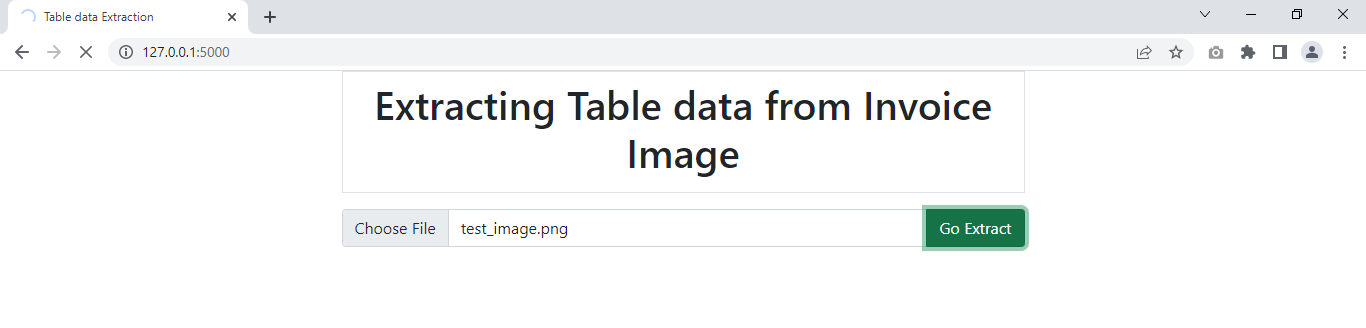

### Business Objectives :

> low-latency is better : As this is a part of invoice information extraction, if it is used in production, companies may like to use it to automate the invoice extraction process, so they expect out model to work within few seconds.

> Good Accuracy : If the extraction process involves a human supervision, where he will check the results and edit it if few mistakes are found, then the 100% accuracy is not needed, but if they want to automate the process then the accuracy should be almost 100%, as the invoice tables might contain products and their billing.

> Use suitable techniques to overcome less data availability : Even though we have less data, we can yield better prediction results by using techniques like data augumentation, better hyper parameter tuning, and training with large epochs.

### Business Constraints :

> Not a large dataset :
	The dataset available is not large, it contains 240 invoices images after removing duplicates. I didn’t more invoices as they subject to privacy, And I couldn’t find a dataset.

> quality of the images : 
	While pre-processing I have understood that the quality of few invoices images are not good, so I have used few techniques to improve their quality but still may not be better, so more data is always useful.

> Resouces to train Deep Learning model : 
	To Train or use deep learning model, the presence GPU will be helpful, but I am working on a base computer which takes time to train.

### Data Collection

* The initial step is data collection, I have collected almost 300 invoices, few from internet and the rest from my currently working company with their permission, Anyhow I am not going to share those invoices, so I have used them in my training.

## Image PreProcessing

* I am going to pre-process the images before passing to object detection model, as per the requirements.
* The basic requirements are :
    * The Image should be in binary format (as we don't consider color as an important feature, and making the gray images reduce the computations compare to color images)
    * The images will be thresholded using different techniques to sharpen the text.
    * Images will be resized to same scale for better training.
    * I am not using image augumentation here, as it doesnot affect much in this case, and as I am using a pre-trained model, it doesnot require much images to produce better results.

> Image Thresholding : https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html, Image thresholding will help in enhance the images, which will be helpful in both object detection task and tesseract-oct text data extraction.

In [ ]:
src = cv.imread(image_path)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.bitwise_not(gray)
ret, thresh_otsu = cv.threshold(gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

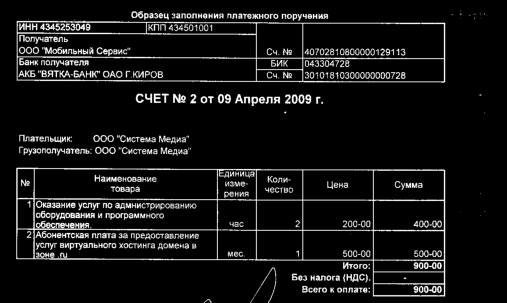

* The above images are enough to train a object detection and model to detect the table structure and also the detected table area can be passed to tessact-ocr to get the text data inside it.
* I am not doing image augumentation, as I am using Transfer Learning using YoLo pre-trained model, I don't need more data to get good results.
* No need to use Image contrast or brighness enhancer, I have used Image thresholding which will set each pixel value as either maximum or minimum.

## Model Analysis, Data Annotation & Model Training

* Object detection is an integral part of computer vision. From the advent of CNNs the image classification and object detection has gained lot of popularity, and many industries started using the best models for their task.
* A standard CNN is not enough to detect an object in an image, bacause the initial approach to solve a object detection algorithm is to choose lot of regions in an image and classify each region as object exists or not, and the similar objects will be united.

> #### Modelling : 
	After going through the object detection literature, I have found that few algorithms worked well, namely CNN, FRCNN, SSD, YOLO. CNN is the base of all these object detection Algorithm. Then I have researched about all these models, and decided to use yolov5, as this is faster and yields good accuracy.
    
> #### Why did I choose YoLo ?
    YoLo is significantly faster than FR-CNN and SSD, and produce comparitively accurate results like FR-CNN.  YOLO is in the orders of magnitude (45 frames per second) faster than other object detection algorithms. It can be used in real time application, and can be scaled to production.

> #### Metrics Used : 
    Mean Average Precision, MAP represents how well the algorithm can locate the centre of an object and how well the predicted bounding box covers an object.

### Data Annotation

* There are many data annotation tools available, out of all I chose Label_Img as I feel it comfortable and one of its data export formats are directly compatible with YoLo.

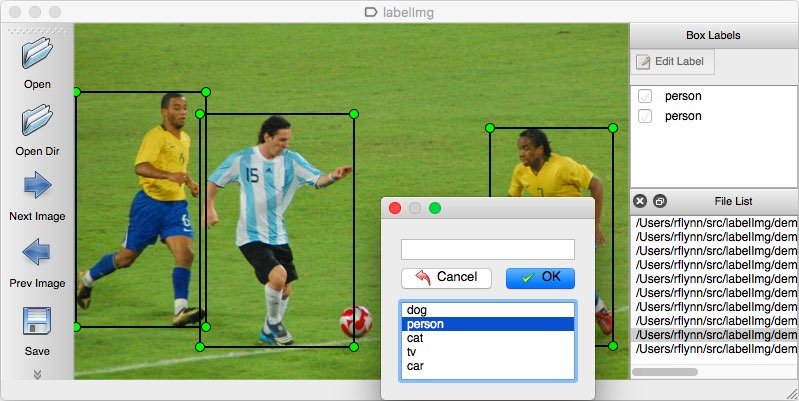

* the yolo formatted data will be saved as a text file, each line represents a label information, say table, each line consists a class label value(0 here, as it contains only one label), and followed by 4 bounding box coordinates in the form of start_left_pixel(x_coordinate), start_top_pixel(x_coordinate), width & height.

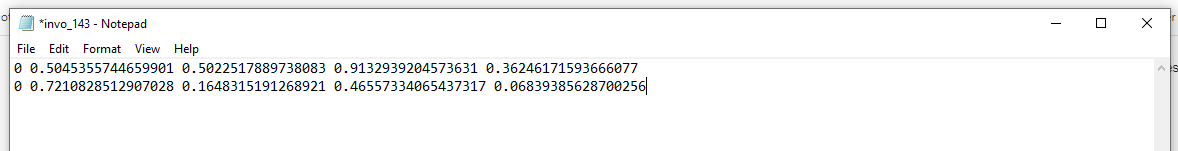

* the above image is the screenshot of yolo formatted data, prepared using Label_IMG.
* Initially there is a website of Label_IMG for data annatation, now they are providing SDKs to do annotation. The python SDK link is here : https://pypi.org/project/labelImg/1.4.0/

### Model Training

* I am using a pre-trained yolo_v5 model, which was trained on coco_ dataset, now I am transfering the its learning to my custom dataset, I will almost follow the same steps that were mentioned in the yolo_v5 documentation.

* YoLo_v5 github page : https://github.com/ultralytics/yolov5

* As I don't have better system resources to train a deep learning model offline, I am using the Google Colab, and the documented yolo_notebook to train my data.

* After adding the training data to colab folder structure, we should configure the yaml file for the model to detect the path of the training data, and also it will define the no. of class labels.

#####  Preparing the training command and start training :

> !python train.py --img 640 --batch 32 --epochs 180 --data custom_data.yaml --weights yolov5s.pt --cache

* train.py is pre-written file provided by yolo to start the training process.
* img 640 : images will be resized to 640 pixes max by width & height, before it is passed to training.
* batch size a hyperparameter of gradient descent that controls the number of training samples to work through before the model's internal parameters are updated.
* The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
* data custom_data.yaml : uses the custom configuration that is set as per the training data.
* weights yolov5s.pt : it uses the yolo_v5 pytorch based pre-trained weights to train the model according to our domain(or custom data).

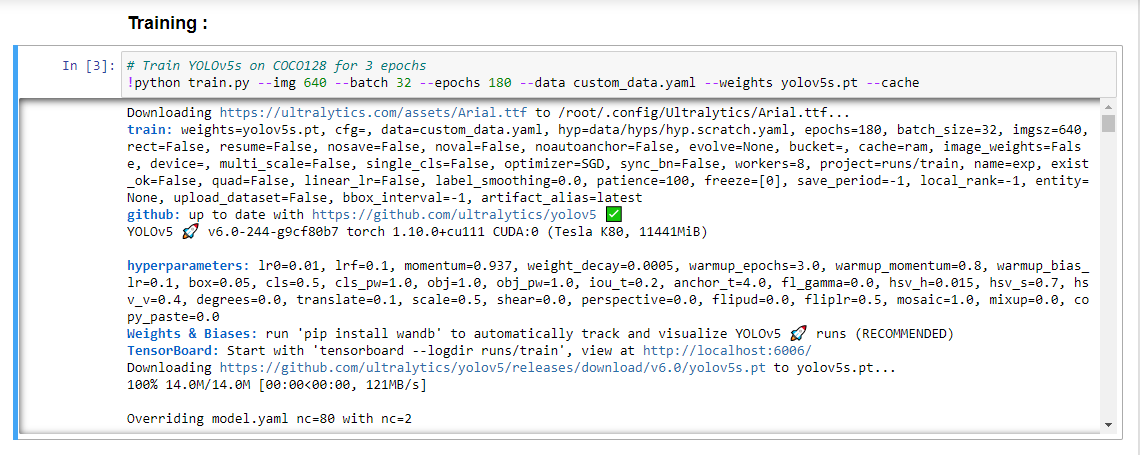

* After completion of training : 

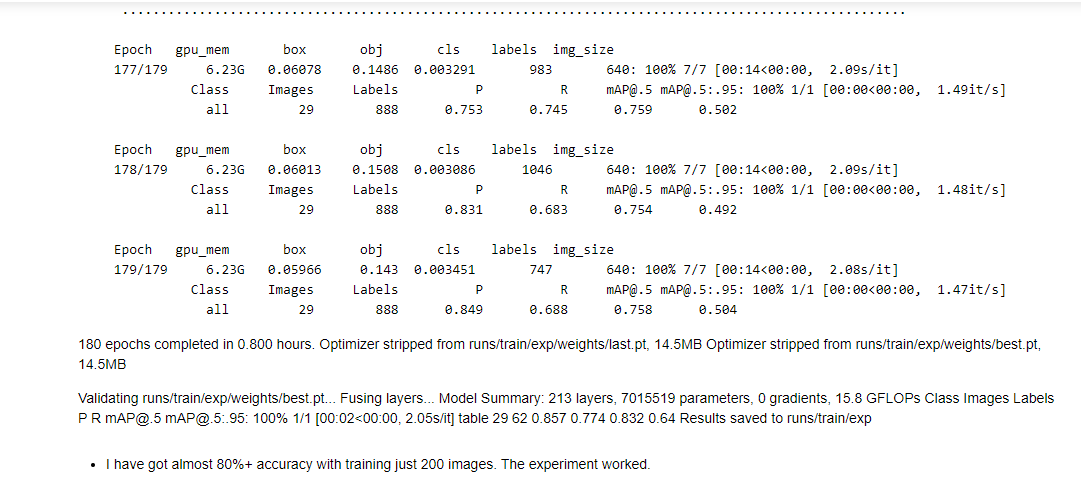

#### Experimenting with hyperParameters :

* I have changed the parameters, the batch_size, image resizing factor, and the no. of epochs and verified the results. 
* after 150 epochs there is no much difference in map(mean absolute precision).

#### Testing the results : Loading the model latest best model.

* using pytorch to load the model, which is a famous python library for deep learning practise.

In [ ]:
import torch
import cv2
import numpy as np

model_name = '../yolo_exp/yolo_ft_210_200_32_10thFeb/best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_name, force_reload=True)

#### Detecting the table and drawing the bounding box on image

In [ ]:
device = 'cpu'
model.to(device)
frame = [frame]
results = model(frame)
labels, cord = results.xyxyn[0][:, -1], results.xyxyn[0][:, :-1]

arr = []

# drawing the predicted bouding boxes on the Image.
for i in range(len(labels)):
    if labels[i] == 1:
        row = cord[i]
        x1, y1, x2, y2 = int(row[0]*w), int(row[1]*h), int(row[2]*w), int(row[3]*h)
        arr.append([y1, y2, x1, x2])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2.imwrite('img/img_tables.png', img)

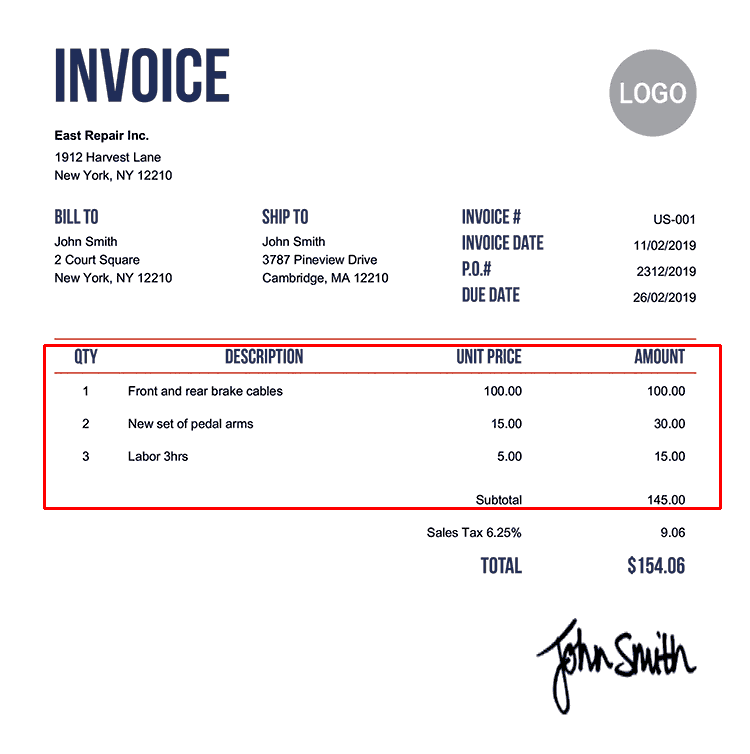

### Extracting data from Table Image, detected using YoLo model

> #### Loading Tesseract Engine :
    pytesseract.pytesseract.tesseract_cmd = "Tesseract_OCR/tesseract.exe"

* The detected table image will passed through my own custom function(or API) which is written to extract the table image to arrays of data.
* you can check that API here : tesseract-sp.herokuapp.com

> #### Local deployed code demo

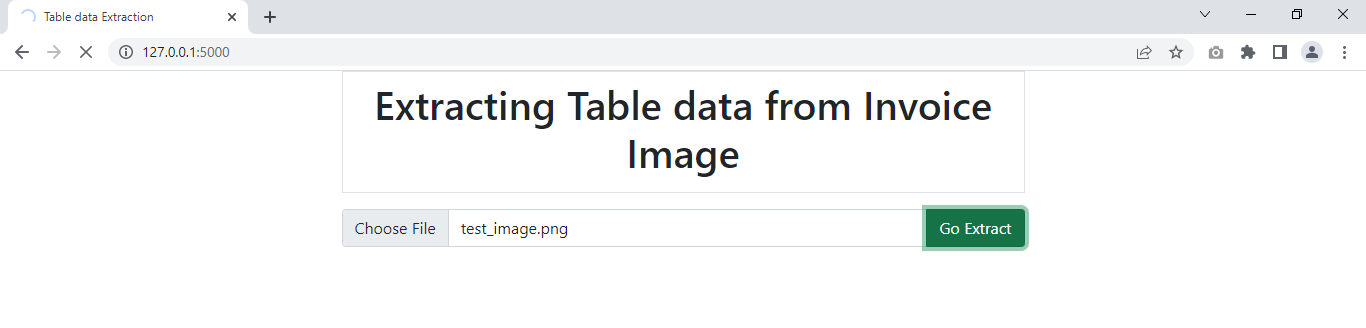

> ##### The input image is the same image, that is passed to yolo model above. The below image is the result of the input image

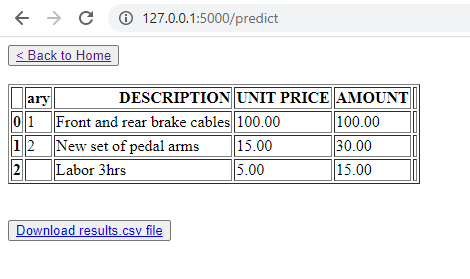

> ##### the extracted table data can also be downloaded in .csv format.

* Finally, it's a bit challenging and interesting journey with the Table data extraction application. Initially I have read somany blogs and few research papers to understand how exactly the object detection happens, then I have known about the YoLo, from them I have build my project step by step, now I am happy that I have build an Intelligent application on myh own.